# MNIST 손글씨 분류 - 신경망

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape # 2차원 데이터로 들어온다.(60000,28,28)-> 2차원은 cnn 머신러닝할려면 1차원 데이터로

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

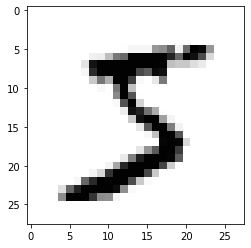

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

(-0.5, 27.5, 27.5, -0.5)

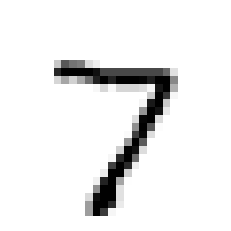

In [7]:
plt.imshow(X_test[0], cmap = 'Greys'); plt.axis('off')

In [12]:
import sys 
for row in X_train[0]:
    for x in row:

        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [17]:
type(X_train), X_train.dtype  # uint8 : unsigned int(8bit) : 0~255

(numpy.ndarray, dtype('uint8'))

In [18]:
# 0 ~ 1 사이의 값으로 정규화 가능
X_train = X_train / 255.
X_test = X_test /255.

In [19]:
X_train, X_test

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [20]:
# 차원 축소(변경) :  이미지(2차원 데이터)  --> 1차원데이터
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1,784)

In [21]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [22]:
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [39]:
# 다중분류에 해당되니깐 one- hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### 모델 정의/설정/실행/평가

In [40]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [41]:
model = Sequential([
                    Dense(512, input_dim = 784, activation= 'relu'),
                    Dense(48, activation= 'relu'),
                    Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 48)                24624     
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

- 베스트 모델을 찾기 위한 설정

In [43]:
model_path = 'mnist_dnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only = True, verbose=1) # 모니터는 디폴트값
early_stop = EarlyStopping(patience=10)

In [44]:
hist = model.fit(X_train, Y_train, validation_split= 0.2, epochs =100, batch_size= 200, verbose=0, callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.16622, saving model to mnist_dnn.h5

Epoch 00002: val_loss improved from 0.16622 to 0.11229, saving model to mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11229 to 0.09353, saving model to mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09353 to 0.08555, saving model to mnist_dnn.h5

Epoch 00005: val_loss improved from 0.08555 to 0.08477, saving model to mnist_dnn.h5

Epoch 00006: val_loss improved from 0.08477 to 0.08086, saving model to mnist_dnn.h5

Epoch 00007: val_loss improved from 0.08086 to 0.07744, saving model to mnist_dnn.h5

Epoch 00008: val_loss improved from 0.07744 to 0.07741, saving model to mnist_dnn.h5

Epoch 00009: val_loss did not improve from 0.07741

Epoch 00010: val_loss did not improve from 0.07741

Epoch 00011: val_loss did not improve from 0.07741

Epoch 00012: val_loss did not improve from 0.07741

Epoch 00013: val_loss did not improve from 0.07741

Epoch 00014: val_loss did not improve from 0.07741

Epo

In [45]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9798


[0.06751708686351776, 0.9797999858856201]

- 학습 과정 시각화

In [46]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

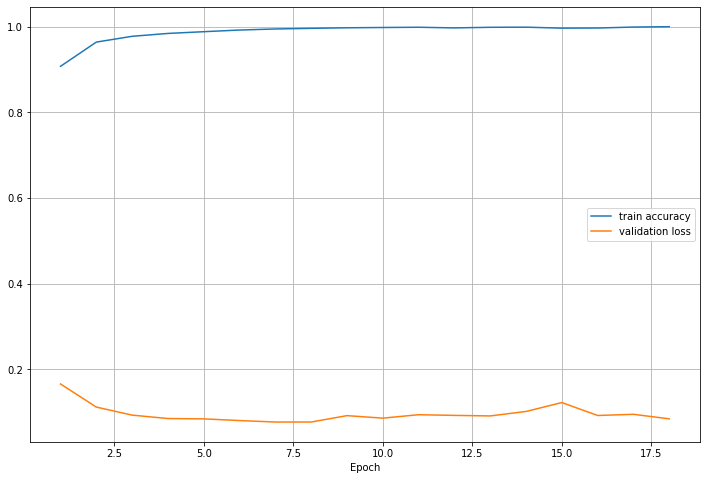

In [47]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, markersize = 3, label = 'train accuracy')
plt.plot(xs, y_vloss, markersize = 3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()


In [ ]:
- 